# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | polyarnyy
Processing Record 6 of Set 1 | homer
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | valparaiso
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | korla
Processing Record 12 of Set 1 | motygino
Processing Record 13 of Set 1 | freeport
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | beaufort west
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | ko pha ngan
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | muzayri'
City not found. Skipping...
Processing Record 22 of Set 1 | 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,295.67,60,0,8.75,ZA,Mon Oct 2 10:51:49 2023
1,papatowai,-46.5619,169.4708,276.74,79,69,3.02,NZ,Mon Oct 2 10:51:55 2023
2,blackmans bay,-43.0167,147.3167,282.22,66,0,4.23,AU,Mon Oct 2 10:51:55 2023
3,stanley,54.8680,-1.6985,287.75,81,20,2.57,GB,Mon Oct 2 10:48:29 2023
4,polyarnyy,69.1989,33.4478,276.43,66,80,4.70,RU,Mon Oct 2 10:51:55 2023


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,295.67,60,0,8.75,ZA,Mon Oct 2 10:51:49 2023
1,papatowai,-46.5619,169.4708,276.74,79,69,3.02,NZ,Mon Oct 2 10:51:55 2023
2,blackmans bay,-43.0167,147.3167,282.22,66,0,4.23,AU,Mon Oct 2 10:51:55 2023
3,stanley,54.8680,-1.6985,287.75,81,20,2.57,GB,Mon Oct 2 10:48:29 2023
4,polyarnyy,69.1989,33.4478,276.43,66,80,4.70,RU,Mon Oct 2 10:51:55 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

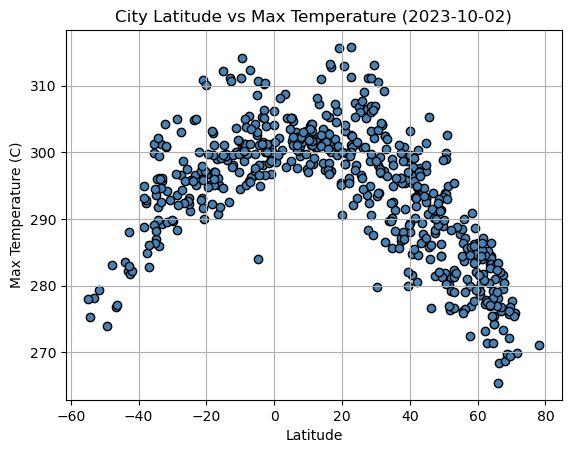

In [24]:
# Build scatter plot for latitude vs. temperature
figure_1 = plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolors="black",color='steelblue')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

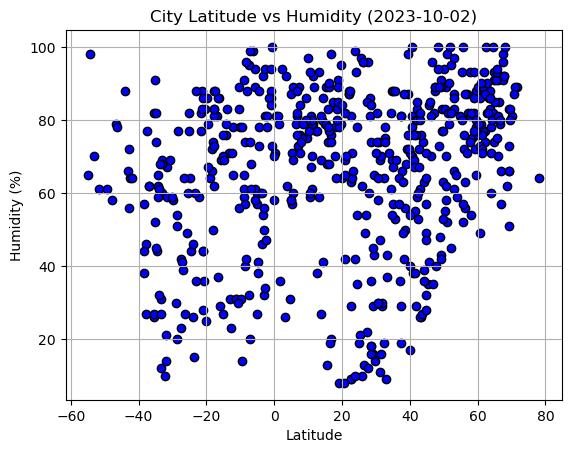

In [26]:
# Build the scatter plots for latitude vs. humidity
figure_2 = plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",edgecolors="black",color='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

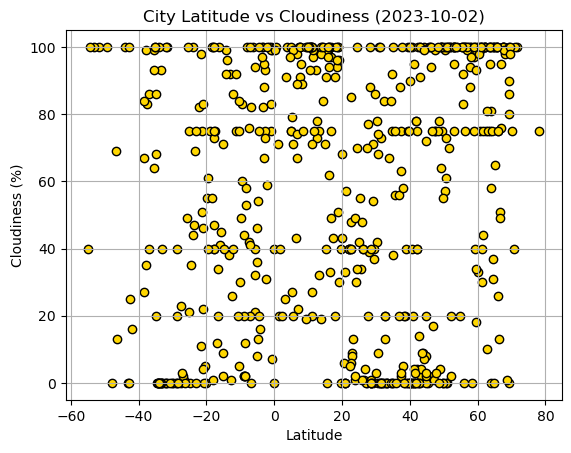

In [27]:
# Build the scatter plots for latitude vs. cloudiness
figure_3 = plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",edgecolors="black",color='gold')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

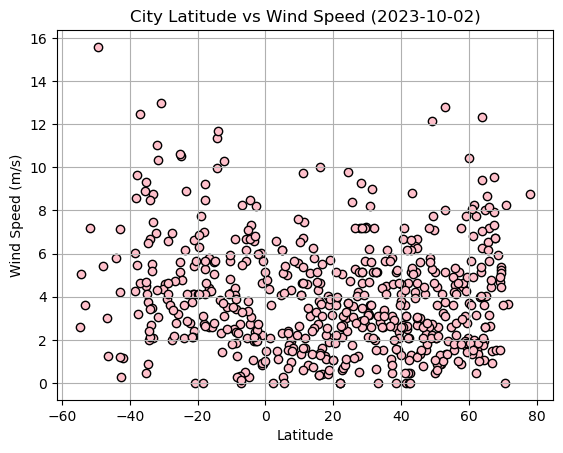

In [28]:
# Build the scatter plots for latitude vs. wind speed
figure_4 = plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",edgecolors="black",color='pink')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x,y,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r-value is: {rvalue}")
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,color = 'r')
    line_note = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    plt.annotate(line_note,(min(x),min(regress_values)),color="red",fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,stanley,54.8680,-1.6985,287.75,81,20,2.57,GB,Mon Oct 2 10:48:29 2023
4,polyarnyy,69.1989,33.4478,276.43,66,80,4.70,RU,Mon Oct 2 10:51:55 2023
5,homer,59.6425,-151.5483,282.08,88,100,2.06,US,Mon Oct 2 10:47:27 2023
10,korla,41.7597,86.1469,293.08,29,78,2.51,CN,Mon Oct 2 10:51:56 2023
11,motygino,58.1831,94.7592,276.92,54,100,4.47,RU,Mon Oct 2 10:51:56 2023


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,295.67,60,0,8.75,ZA,Mon Oct 2 10:51:49 2023
1,papatowai,-46.5619,169.4708,276.74,79,69,3.02,NZ,Mon Oct 2 10:51:55 2023
2,blackmans bay,-43.0167,147.3167,282.22,66,0,4.23,AU,Mon Oct 2 10:51:55 2023
6,puerto natales,-51.7236,-72.4875,279.40,61,100,7.20,CL,Mon Oct 2 10:51:56 2023
7,port-aux-francais,-49.3500,70.2167,274.01,61,100,15.58,TF,Mon Oct 2 10:51:56 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8217245808988667


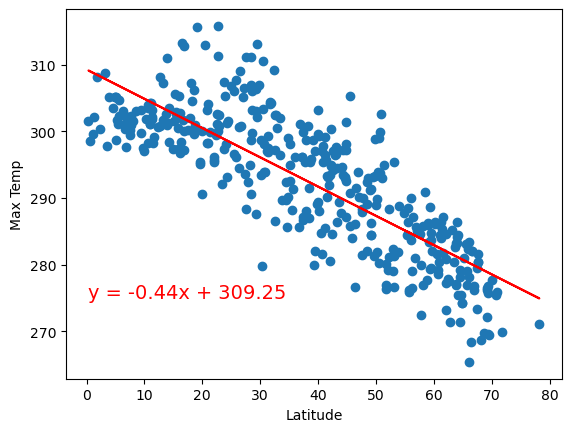

In [49]:
# Linear regression on Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp")

The r-value is: 0.69541148637525


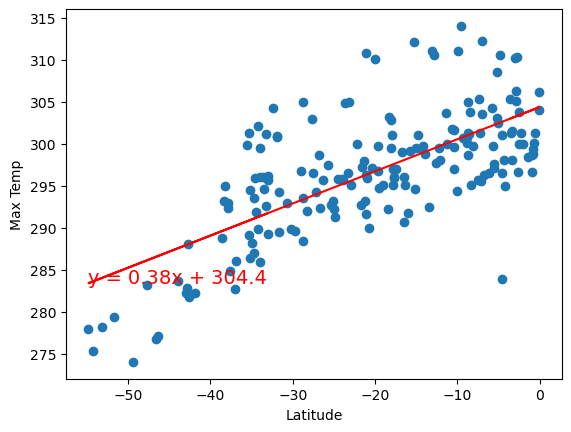

In [50]:
# Linear regression on Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp")

**Discussion about the linear relationship:** 
Temperature vs. Latitude have very strong negative coorelation in Northern Hemisphere, and strong positive coorelation in southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19035945533752924


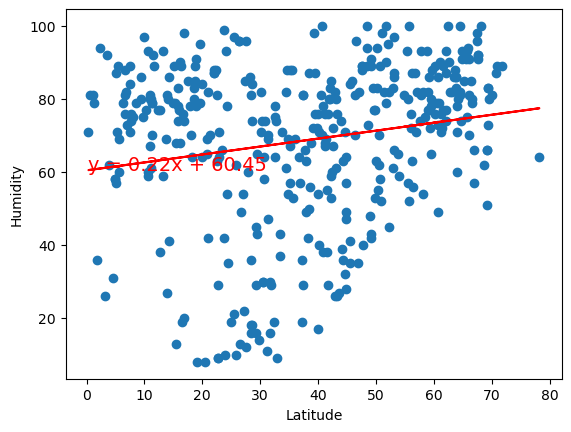

In [51]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity")

The r-value is: 0.15983988795246132


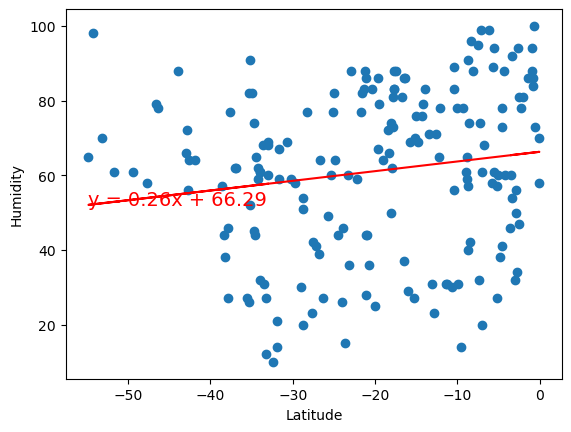

In [52]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity")

**Discussion about the linear relationship:** Humidity vs. Latitude have very weak positive coorelation in Northern Hemisphere and southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09894199476017015


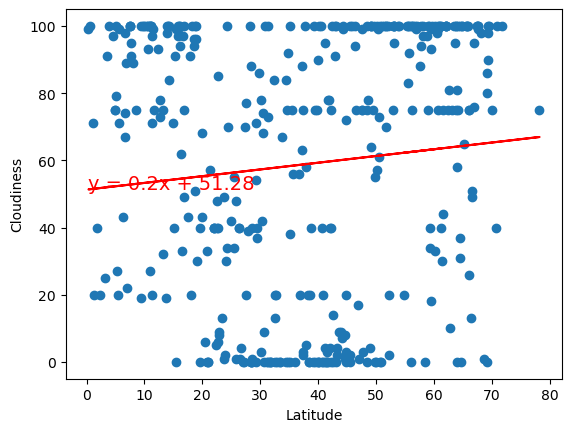

In [53]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

The r-value is: 0.12221707799742426


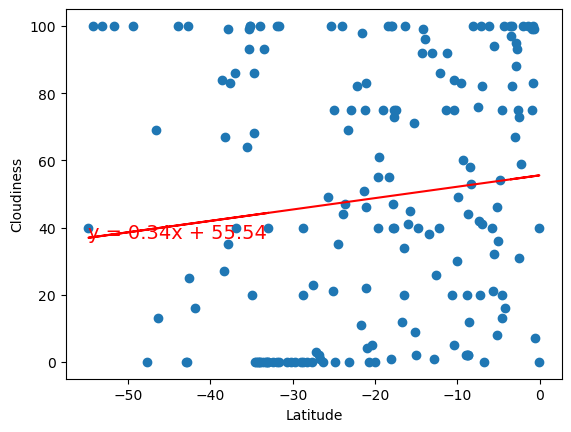

In [54]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

**Discussion about the linear relationship:** 
Cloudiness vs. Latitude have very weak positive coorelation in Northern Hemisphere and southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1511969859258151


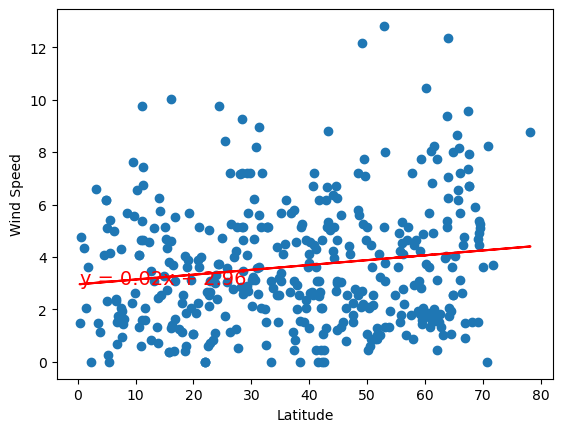

In [55]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

The r-value is: -0.20244531810561048


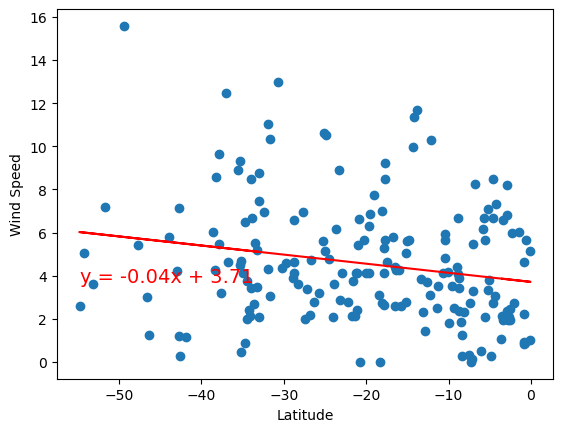

In [56]:
# Southern Hemisphere
# Southern Hemisphere
linear_reg_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

**Discussion about the linear relationship:** 
Wind Speed vs. Latitude have very weak positive coorelation in Northern Hemisphere, and weak negative coorelation southern Hemisphere.